In [1]:
#clear your memory
rm(list = ls())

#update packages
update.packages(ask = FALSE)

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

packages <- c('AER','stargazer','readr','dplyr','car','Hmisc', 'ggplot2','lmtest')

ipak(packages)

Loading required package: AER

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Warning message:
“package ‘survival’ was built under R version 4.1.1”
Loading required package: stargazer


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Loading required package: readr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: H

AER stargazer     readr     dplyr       car     Hmisc   ggplot2    lmtest 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

In [2]:
library(readr)
library(dplyr)
library(car)
library(Hmisc)
library(AER)
library(stargazer)
library(ggplot2)
library(lmtest)

In [3]:
data <- read_csv("HPRICE3.csv")

Rows: 321 Columns: 19

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): year, age, agesq, nbh, cbd, inst, linst, price, rooms, area, land,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# drop observations with year = 1981

In [4]:
summary(data$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1978    1978    1978    1979    1981    1981 

In [5]:
data = data[data$year == 1978,]

In [6]:
summary(data$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1978    1978    1978    1978    1978    1978 

# (a)

In [7]:
summary(data)

      year           age             agesq            nbh       
 Min.   :1978   Min.   :  0.00   Min.   :    0   Min.   :0.000  
 1st Qu.:1978   1st Qu.:  0.00   1st Qu.:    0   1st Qu.:0.000  
 Median :1978   Median :  5.00   Median :   25   Median :2.000  
 Mean   :1978   Mean   : 21.21   Mean   : 1871   Mean   :2.402  
 3rd Qu.:1978   3rd Qu.: 23.00   3rd Qu.:  529   3rd Qu.:4.000  
 Max.   :1978   Max.   :189.00   Max.   :35721   Max.   :6.000  
      cbd             inst           linst            price       
 Min.   : 1000   Min.   : 1000   Min.   : 6.908   Min.   : 26000  
 1st Qu.: 7000   1st Qu.: 7500   1st Qu.: 8.920   1st Qu.: 56450  
 Median :17000   Median :17000   Median : 9.741   Median : 75500  
 Mean   :16425   Mean   :17128   Mean   : 9.504   Mean   : 76628  
 3rd Qu.:24000   3rd Qu.:26000   3rd Qu.:10.166   3rd Qu.: 90200  
 Max.   :35000   Max.   :34000   Max.   :10.434   Max.   :300000  
     rooms             area           land            baths      
 Min.   : 

# (c)

In [8]:
data$lcbd = log(data$cbd)
summary(data$lcbd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.908   8.854   9.741   9.449  10.086  10.463 

In [9]:
M1 = lm(lprice ~ rooms + baths + larea + lland + age + agesq + lcbd, data=data)

summary(M1)


Call:
lm(formula = lprice ~ rooms + baths + larea + lland + age + agesq + 
    lcbd, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17821 -0.09763  0.01187  0.11190  0.74883 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.367e+00  5.573e-01  13.218  < 2e-16 ***
rooms        6.201e-02  2.227e-02   2.784  0.00597 ** 
baths        6.591e-02  3.762e-02   1.752  0.08157 .  
larea        3.796e-01  7.345e-02   5.168 6.54e-07 ***
lland        1.061e-01  3.282e-02   3.231  0.00148 ** 
age         -8.190e-03  1.941e-03  -4.220 3.96e-05 ***
agesq        3.590e-05  1.124e-05   3.195  0.00166 ** 
lcbd        -6.376e-02  3.732e-02  -1.709  0.08934 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2122 on 171 degrees of freedom
Multiple R-squared:  0.6786,	Adjusted R-squared:  0.6655 
F-statistic: 51.59 on 7 and 171 DF,  p-value: < 2.2e-16


In [10]:
stargazer(M1,
  header=FALSE, 
  type="text",  
  digits=4, 
  intercept.bottom=TRUE, 
  dep.var.caption="Dependent variable: lwage",
  model.names=FALSE,
  omit.stat=c("LL","ser","f"))


              Dependent variable: lwage 
             ---------------------------
                       lprice           
----------------------------------------
rooms                 0.0620***         
                      (0.0223)          
                                        
baths                  0.0659*          
                      (0.0376)          
                                        
larea                 0.3796***         
                      (0.0735)          
                                        
lland                 0.1061***         
                      (0.0328)          
                                        
age                  -0.0082***         
                      (0.0019)          
                                        
agesq                0.00004***         
                      (0.00001)         
                                        
lcbd                  -0.0638*          
                      (0.0373)          
               

In [11]:
bath_coef = summary(M1)$coefficients[3,1]

per_change = 100 * ( exp(bath_coef)-1)
ratio = per_change / (100*bath_coef)

print(paste0("percentage change : ", per_change))

print(paste0("ratio of percentage change to orignial value * 100 : ", ratio))

[1] "percentage change : 6.81262102642044"
[1] "ratio of percentage change to orignial value * 100 : 1.0336889722373"


# (d)

In [12]:
summary(M1)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.366848e+00,5.573330e-01,13.218037,6.182657e-28
rooms,6.201171e-02,2.227109e-02,2.784404,5.967028e-03
baths,6.590591e-02,3.761778e-02,1.751988,8.156842e-02
larea,3.796112e-01,7.345300e-02,5.168083,6.539844e-07
lland,1.060661e-01,3.282369e-02,3.231387,1.477856e-03
age,-8.190353e-03,1.941031e-03,-4.219588,3.963814e-05
agesq,3.589882e-05,1.123527e-05,3.195189,1.664262e-03
lcbd,-6.376074e-02,3.731807e-02,-1.708576,8.934398e-02


In [13]:
b_lland  = summary(M1)$coefficients[5,1]
se_lland = summary(M1)$coefficients[5,2]
t_cutoff = qt(0.025, df.residual(M1), lower.tail=FALSE) 

ci_upper = b_lland + se_lland * t_cutoff
ci_lower = b_lland - se_lland * t_cutoff

print(paste0("the upper bound is : ", ci_upper))
print(paste0("the lower bound is : ", ci_lower))


[1] "the upper bound is : 0.170857875185522"
[1] "the lower bound is : 0.0412742690327088"


# (e)

In [14]:
b_lcbd  = summary(M1)$coefficients[8,1]
se_lcbd = summary(M1)$coefficients[8,2]

hyp_val = 0
sig_lev = 0.1
t_value = (b_lcbd-0)/se_lcbd
p_value = pt(t_value, df.residual(M1)) 

print(paste0("the t value is : ", t_value))
print(paste0("the left-tail p value is  : ", p_value))
print(paste0("the sig level is  : ", sig_lev))

if (p_value < sig_lev) {
    print("H0 is rejected since p value is less than sig level")
} else{
    print("H0 is not rejected since p value is larger than sig level")
}

[1] "the t value is : -1.70857576942251"
[1] "the left-tail p value is  : 0.0446719887075529"
[1] "the sig level is  : 0.1"
[1] "H0 is rejected since p value is less than sig level"


# (f)

the minimum value of yhat is obtained at  114.0755

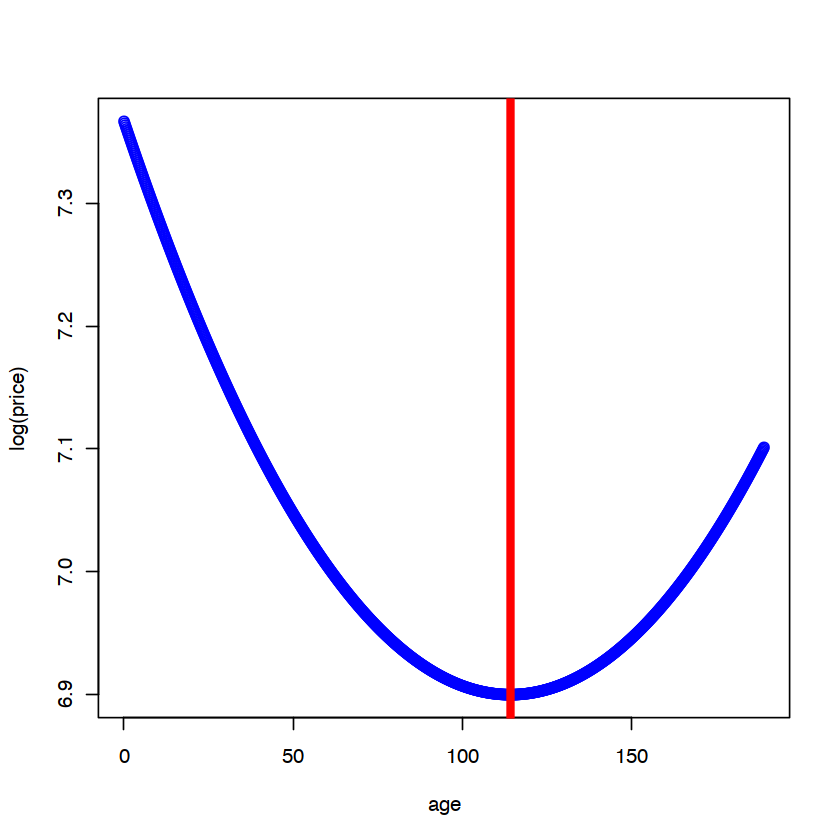

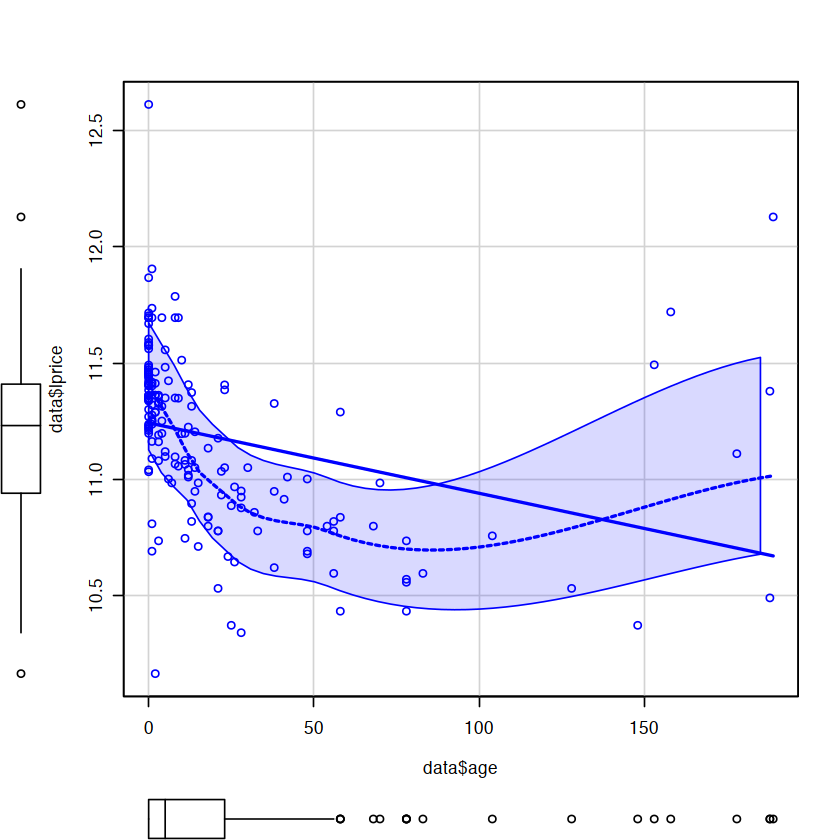

In [15]:
coef_OLS = summary(M1)$coefficients[,1]

x_range  = seq(min(data$age),max(data$age), length.out = 1000)
x2_range = x_range^2 

yhat = coef_OLS[1] + coef_OLS[6] * x_range + coef_OLS[7] * x2_range
arg_min = -1 * coef_OLS[6]/(2*coef_OLS[7])

plot(x_range, yhat, col = 'blue', xlab="age" , ylab="log(price)")
abline(v=arg_min, col = 'red', lwd= 5)

cat('the minimum value of yhat is obtained at ', arg_min)

scatterplot(data$age, data$lprice)

# (g)

In [16]:
linearHypothesis(M1, c("age=0", "agesq=0"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,173,9.040302,NA,NA,NA,NA
2,171,7.703188,2,1.337114,14.84103,1.139429e-06


# (h)

In [17]:
bptest(M1)


	studentized Breusch-Pagan test

data:  M1
BP = 5.714, df = 7, p-value = 0.5735


# (i)

In [18]:
M2 = lm(lprice ~ rooms + baths + larea + lland + age + agesq, data=data)

summary(M2)


Call:
lm(formula = lprice ~ rooms + baths + larea + lland + age + agesq, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17619 -0.09539  0.01556  0.11038  0.84557 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.057e+00  5.300e-01  13.316  < 2e-16 ***
rooms        5.763e-02  2.225e-02   2.591 0.010402 *  
baths        7.353e-02  3.756e-02   1.958 0.051874 .  
larea        3.891e-01  7.365e-02   5.283 3.81e-07 ***
lland        7.017e-02  2.536e-02   2.767 0.006276 ** 
age         -6.665e-03  1.733e-03  -3.846 0.000169 ***
agesq        2.792e-05  1.028e-05   2.717 0.007256 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2134 on 172 degrees of freedom
Multiple R-squared:  0.6732,	Adjusted R-squared:  0.6618 
F-statistic: 59.04 on 6 and 172 DF,  p-value: < 2.2e-16


In [19]:
stargazer(M1, M2,
    header=FALSE, 
    type="text",  
    digits=4, 
    intercept.bottom=TRUE, 
    dep.var.caption="Dependent variable: lwage",
    model.names=FALSE,
    omit.stat=c("LL","ser","f"),
    add.lines=list(c("BIC", round(BIC(M1),1), round(BIC(M2),1))))


              Dependent variable: lwage  
             ----------------------------
                        lprice           
                  (1)            (2)     
-----------------------------------------
rooms          0.0620***      0.0576**   
                (0.0223)      (0.0222)   
                                         
baths           0.0659*        0.0735*   
                (0.0376)      (0.0376)   
                                         
larea          0.3796***      0.3891***  
                (0.0735)      (0.0737)   
                                         
lland          0.1061***      0.0702***  
                (0.0328)      (0.0254)   
                                         
age            -0.0082***    -0.0067***  
                (0.0019)      (0.0017)   
                                         
agesq          0.00004***    0.00003***  
               (0.00001)      (0.00001)  
                                         
lcbd            -0.0638*         

# (j)

In [20]:
data$area_room = data$larea * data$rooms

In [21]:
M3 = lm(lprice ~ rooms + baths + larea + lland + age + agesq + lcbd + area_room, data=data)

summary(M3)


Call:
lm(formula = lprice ~ rooms + baths + larea + lland + age + agesq + 
    lcbd + area_room, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16498 -0.08684  0.00690  0.09837  0.71838 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.373e+01  1.998e+00   6.870 1.16e-10 ***
rooms       -9.504e-01  3.069e-01  -3.097  0.00229 ** 
baths        5.387e-02  3.675e-02   1.466  0.14457    
larea       -4.758e-01  2.683e-01  -1.773  0.07797 .  
lland        1.005e-01  3.195e-02   3.146  0.00195 ** 
age         -7.962e-03  1.888e-03  -4.216 4.02e-05 ***
agesq        3.137e-05  1.101e-05   2.849  0.00492 ** 
lcbd        -5.531e-02  3.637e-02  -1.521  0.13015    
area_room    1.358e-01  4.106e-02   3.307  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2063 on 170 degrees of freedom
Multiple R-squared:  0.6981,	Adjusted R-squared:  0.6839 
F-statistic: 49.13 on 8 and 170 DF, 

In [22]:
stargazer(M1, M2,M3,
    header=FALSE, 
    type="text",  
    digits=4, 
    intercept.bottom=TRUE, 
    dep.var.caption="Dependent variable: lwage",
    model.names=FALSE,
    omit.stat=c("LL","ser","f"),
    add.lines=list(c("BIC", round(BIC(M1),1), round(BIC(M2),1), round(BIC(M3),1))))


                Dependent variable: lwage    
             --------------------------------
                          lprice             
                (1)        (2)        (3)    
---------------------------------------------
rooms        0.0620***   0.0576**  -0.9504***
              (0.0223)   (0.0222)   (0.3069) 
                                             
baths         0.0659*    0.0735*     0.0539  
              (0.0376)   (0.0376)   (0.0368) 
                                             
larea        0.3796***  0.3891***   -0.4758* 
              (0.0735)   (0.0737)   (0.2683) 
                                             
lland        0.1061***  0.0702***  0.1005*** 
              (0.0328)   (0.0254)   (0.0320) 
                                             
age          -0.0082*** -0.0067*** -0.0080***
              (0.0019)   (0.0017)   (0.0019) 
                                             
agesq        0.00004*** 0.00003*** 0.00003***
             (0.00001)  (0.00001)